# <font color='blue'>Image denoising using an Ising model</font>

Following code denoises a corrupted image using Bayesian inference with a very simple prior.

### <font color='blue'>Preliminaries</font>

To begin with, OpenCV should be installed (`pip install opencv-python`).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

This next routine loads in an image. The code works with `noisy_bear.png`, which is a corrupted version of `original_bear.png`. The image is 62-by-62; it is binarized to values -1 and +1, and then embedded in the center of a 64-by-64 image whose edges are padded with zeros.

In [ ]:
# Subroutine for loading an image
# Any pixel with value >= 128 is set to +1
# Any pixel with value < 128 is set to -1
def load_image(filename):
  img = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
  img = img/255.0
  img[img>=0.5]=1.0
  img[img<0.5]=0.0
  img = img*2-1
  return img

# Load in both the degraded image and the original
img = load_image("noisy_bear.png")
gt = load_image("original_bear.png")
M,N = img.shape[0], img.shape[1]

# Create a version of img that is padded with zeros all around
padded_image = np.zeros((img.shape[0]+2, img.shape[1]+2)) #Padding image to make some computations easier
padded_image[1:-1,1:-1] = img

### <font color='blue'>The probabilistic model</font>

Let $X$ denote the degraded image (of size $M \times N$) and $Y$ the original image to be reconstructed. Following figure depicts a simple probabilistic model of the joint distribution of $(X,Y)$:


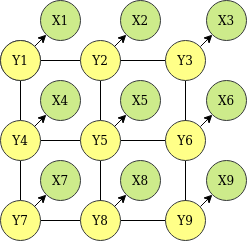


Let $p = (i,j)$ denote a position in the image and let $X_p = X(i,j), Y_p = Y(i,j)$ be the values of $X$ and $Y$ at that location. Recall that these values are -1 or +1. Write $p \sim q$ if $p,q$ are neighboring pixels; note that pixel $p = (i,j)$ has neighbors ${\mathcal{N}}(p) = \{ (i-1,j), (i+1,j), (i,j-1), (i,j+1)\}$. Then the probability of $X,Y$ is:

$$Pr(X,Y) \propto \prod\limits_{p \in [M] \times [N]} \phi(X_{p},Y_{p})\prod\limits_{p \sim q}\phi(Y_p, Y_q) $$

Here all clique potentials are identical functions with $\phi(u, v) = e^{uv}$.

### <font color='blue'>Sampling from the posterior</font>

Gibbs sampling is used to sample from the <b>posterior distribution over $Y$ given $X$</b> :

* Initialize the recovered image with each pixel set uniformly to $\{-1,+1\}$
* Repeatedly choose a pixel $p$ to update and re-sample its value from $Pr(Y_p | X, Y_{\setminus p})$.

In the final reconstructed image, each pixel p is set to the sign of the posterior marginal $E[Y_p | X]$.

In [ ]:
Y = np.zeros((img.shape[0]+2, img.shape[1]+2))
Y[1:-1,1:-1] = 2*np.random.randint(0, 2, size=(img.shape[0], img.shape[1])) - 1

def sample(X, Y, Ysum, iter):
    for i in range(iter):
        row = np.random.randint(1, Y.shape[0]-1)
        col = np.random.randint(1, Y.shape[1]-1)
        val = np.exp(X[row, col]+(Y[row+1, col]+Y[row, col+1]+Y[row-1, col]+Y[row, col-1]))
        prob = (val**2)/(1+val**2)

        if(np.random.uniform(0, 1) <= prob):
            Y[row, col] = 1
            Ysum[row, col] += 1
        else:
            Y[row, col] = -1
            Ysum[row, col] -= 1

    return Y, Ysum

Text(0.5, 1.0, 'After 30000 samples')

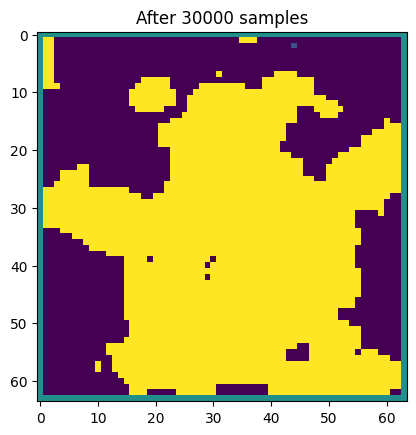

In [ ]:
Y, Ysum = sample(padded_image, Y, Y, 30000)
plt.imshow(Y)
plt.title("After 30000 samples")

Text(0.5, 1.0, 'After 60000 samples')

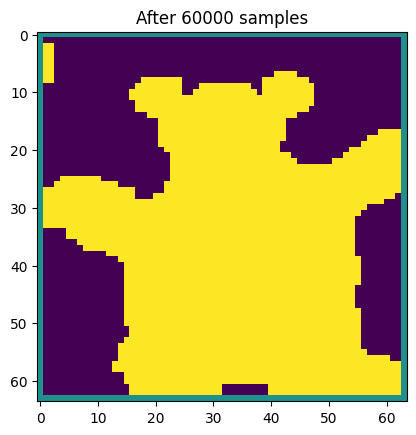

In [ ]:
Y, Ysum = sample(padded_image, Y, Ysum, 30000)
plt.imshow(Y)
plt.title("After 60000 samples")

Text(0.5, 1.0, 'After 90000 samples')

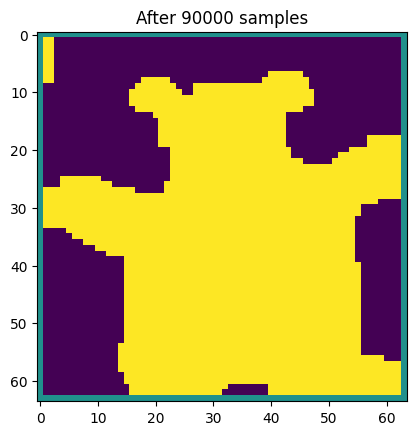

In [ ]:
Y, Ysum = sample(padded_image, Y, Ysum, 30000)
plt.imshow(Y)
plt.title("After 90000 samples")

Text(0.5, 1.0, 'After 120000 samples')

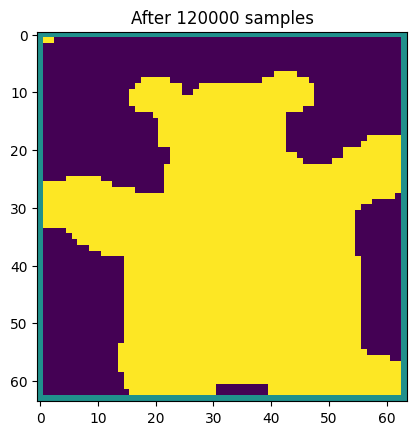

In [ ]:
Y, Ysum = sample(padded_image, Y, Ysum, 30000)
plt.imshow(Y)
plt.title("After 120000 samples")

Text(0.5, 1.0, 'After 150000 samples')

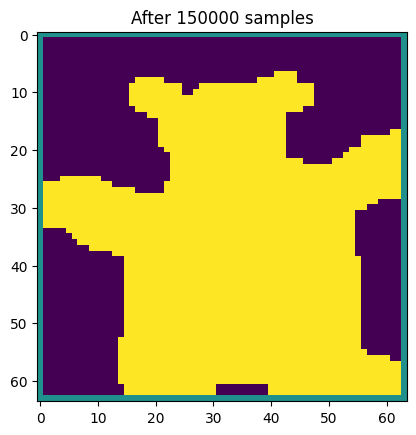

In [ ]:
Y, Ysum = sample(padded_image, Y, Ysum, 30000)
plt.imshow(Y)
plt.title("After 150000 samples")

Text(0.5, 1.0, 'Reconstructed image')

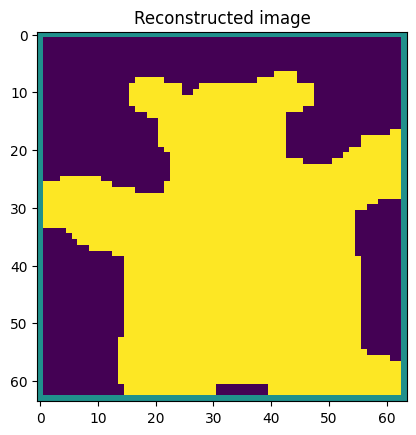

In [ ]:
Ysum = np.sign(Ysum)
plt.imshow(Ysum)
plt.title("Reconstructed image")